In [8]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [9]:
def max_abs_scale(series):
    return series / series.abs().max()

image_order = ["500b", "100Kb", "256Kb", "1Mb", "15Mb"]
model_order = ["resnet18", "resnet34", "resnet50", "resnet152"]

dfe = pd.read_csv("./result/energy.csv")

dfm = pd.read_csv("./result/result.csv")  

Energy data frame pre-processing 

In [10]:
energy_features = [
    "cpu0_core_joules"
]

# dfte : Data Frame Total Energy 
dfte = (
    dfe.copy()
    .assign(
        energy=lambda df: df[energy_features].sum(axis=1)
    )
    .groupby(['library', 'image'], as_index=False)['energy']
    .agg(std_energy='std', mean_energys='mean')
    .assign(
        # mean_energys=lambda df: df.groupby('image')['mean_energys'].transform(max_abs_scale),
        image=lambda df: pd.Categorical(df['image'], categories=image_order, ordered=True),
    )
    .sort_values(['library', 'image'])
)


# dftt.head()

In [11]:
dfw = dfte[dfte['image'] == '256Kb']

 
dfw.head()


,library,image,std_energy,mean_energys
3,opencv,256Kb,1.767185,15.752951
8,pillow,256Kb,3.013469,17.871666
13,pygame,256Kb,5.291231,21.885220
18,wand,256Kb,10.963514,19.625557


In [12]:
def bar_ax_style(ax, ylabel, xlabel):
    
    """_summary_

    Returns:
        _type_: _description_
    """
    ax.set_ylabel(ylabel , fontsize=12, labelpad=12)  # Set the labels and title
    ax.set_xlabel(xlabel , fontsize=12, labelpad=12)  # Set the labels and title
    
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
    
    return ax

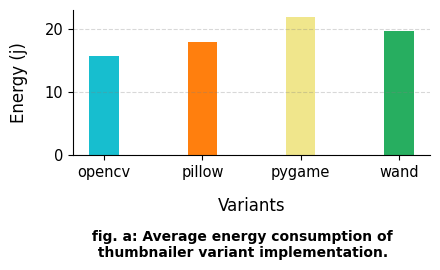

In [17]:
bar_colors = ['#17becf', '#ff7f0e', '#f0e68c', '#27ae60', '#ee9f6e']
 

fig, ax = plt.subplots(figsize=(4.5, 2.8))  

ax.bar(
        dfw['library'], dfw['mean_energys'], 
        width=0.3, 
        color=bar_colors
    )

ax = bar_ax_style(ax, "Energy (j)", "Variants")

ax.tick_params(axis='both', which='major', labelsize=10.5)

fig.suptitle(""" fig. a: Average energy consumption of \n thumbnailer variant implementation. """
             , y=0, x=0.55, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
 
 